### Data Science Game 2017

Data fields

    media_id - identifiant of the song listened by the user
    album_id - identifiant of the album of the song
    media_duration - duration of the song
    user_gender -  gender of the user
    user_id -  anonymized id of the user
    context_type - type of content where the song was listened: playlist, album ...
    release_date - release date of the song with the format YYYYMMDD
    ts_listen - timestamp of the listening in UNIX time
    platform_name - type of os
    platform_family - type of device
    user_age - age of the user
    listen_type - if the songs was listened in a flow or not
    artist_id - identifiant of the artist of the song
    genre_id - identifiant of the genre of the song
    is_listened - 1 if the track was listened, 0 otherwise


In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("../data/train_data4.csv")
df_test = pd.read_csv("../data/test_data4.csv")

df_train["user_id_id"] = df_train["user_id"]
df_test["user_id_id"] = df_test["user_id"]

In [3]:
len(df_train)

7558817

In [4]:
df_train["user_id_id"].min()

0

In [5]:
df_test["user_id_id"].min()

0

### Analisando quantidade de registro por usuário

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use(['dark_background'])
#plt.style.use('ggplot')
register_count = df_train["user_id"].value_counts()
register_count.describe()
# plt.show()

count    19918.000000
mean       379.496787
std        508.267045
min          1.000000
25%         66.000000
50%        197.000000
75%        495.000000
max       6317.000000
Name: user_id, dtype: float64

In [7]:
register_count[:5].index.values

array([0, 1, 2, 3, 4])

In [8]:
df_train = df_train[df_train["user_id"].isin(register_count[:].index.values)]

(array([  1.61650000e+04,   2.60900000e+03,   7.13000000e+02,
          2.60000000e+02,   9.50000000e+01,   3.80000000e+01,
          2.10000000e+01,   8.00000000e+00,   6.00000000e+00,
          3.00000000e+00]),
 array([  1.00000000e+00,   6.32600000e+02,   1.26420000e+03,
          1.89580000e+03,   2.52740000e+03,   3.15900000e+03,
          3.79060000e+03,   4.42220000e+03,   5.05380000e+03,
          5.68540000e+03,   6.31700000e+03]),
 <a list of 10 Patch objects>)

/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


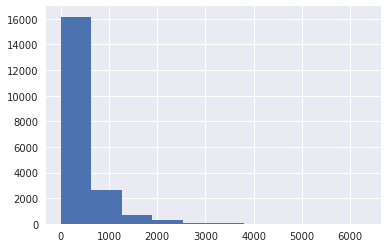

In [9]:
%matplotlib inline
plt.hist(df_train["user_id"].value_counts())

In [10]:
threshold = 5

user_for_general_model = register_count[(register_count <= threshold)].index
user_for_specific_model = register_count[(register_count > threshold)].index
print(len(user_for_general_model))
print(len(user_for_specific_model))

662
19256


In [11]:
# ### select users for specific
# df_train = df_train[df_train["user_id"].isin(user_for_specific_model)]
# df_test = df_test[df_test["user_id"].isin(user_for_specific_model)]
# df_train.columns

In [12]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
df_train.drop(to_drop, axis = 1,inplace=True)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,artist_albuns,artist_fans,artist_radio,media_bpm,media_rank,user_id_id
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,0,2,16.580822,7,1.0,32.0,1.0,100.1,292784.0,9241
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01 00:00:00,2,1,3.0,0,...,2,2,19.241096,7,18.0,6204.0,1.0,160.2,317348.0,16547
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,0,2,26.646575,8,23.0,20022.0,1.0,90.1,309034.0,7665
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,0,2,13.915068,6,56.0,442765.0,1.0,124.9,291331.0,1580
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,1,1,15.271233,7,65.0,28423.0,1.0,120.0,406872.0,1812


In [13]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)
#pd.set_option("precision", 2)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,artist_albuns,artist_fans,artist_radio,media_bpm,media_rank,user_id_id
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,0,2,16.580822,7,1.0,32.0,1.0,100.1,292784.0,9241
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01 00:00:00,2,1,3.0,0,...,2,2,19.241096,7,18.0,6204.0,1.0,160.2,317348.0,16547
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,0,2,26.646575,8,23.0,20022.0,1.0,90.1,309034.0,7665
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,0,2,13.915068,6,56.0,442765.0,1.0,124.9,291331.0,1580
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,1,1,15.271233,7,65.0,28423.0,1.0,120.0,406872.0,1812


In [14]:
# pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

In [15]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

In [16]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

### Append User Specific

In [17]:
df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]


#df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
df_user.fillna(0, inplace=True)

df_user["nmidia_PROP_diff"] = df_user['nmidia_with_flow_listened_PROP'] - df_user['nmidia_regular_listened_PROP']

df_user.columns.values

array(['user_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened',
       'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff'], dtype=object)

In [18]:
# x = pd.isnull(df_user).sum()
# x[x > 0]

In [19]:
df_train = pd.merge(df_train, df_user, on="user_id")
df_test = pd.merge(df_test, df_user, on="user_id")
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,media_bpm,media_rank,user_id_id,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow,nmidia_with_flow_listened_PROP,nmidia_regular_listened_PROP,nmidia_PROP_diff
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,100.1,292784.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
1,7,2016-12-01 10:48:50,4301418,400118,9,2009-10-16 00:00:00,1,0,7.0,0,...,102.0,884679.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
2,10,2016-11-30 11:48:22,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
3,10,2016-12-01 07:18:24,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
4,10,2016-11-29 09:42:52,983248,109347,1,2002-10-21 00:00:00,1,0,3.0,1,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242


### Check for NA
#### Ver depois sobre o user_age_group!

In [20]:
# x = pd.isnull(df_train).sum()
# x[x > 0]

In [21]:
# df_train.dropna(inplace=True)

In [22]:
# x = pd.isnull(df_train).sum()
# x[x > 0]
# del x

In [23]:
y = df_train["is_listened"].values

In [24]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

In [25]:
print(len(df_train.columns))
print(len(set(df_train.columns)))

41
41


### Let's inspect the categorical variables!

In [26]:
for col in categorical_cols:
    print("{}: {}".format(col, len(df_train[col].unique())))

genre_id: 2922
media_id: 452965
album_id: 151464
context_type: 74
release_date: 8901
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 19918
artist_id: 67135
user_age: 13


### Strategy
1. Apply onehot to categorical with few classes
2. Rank categories to artist id
3. target encoder for context and genre
4. discard media, album, release date and user_id

In [27]:
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount

In [28]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family',
       'media_duration', 'listen_type', 'user_gender', 'user_id',
       'artist_id', 'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'ts_listen_DAY_OF_WEEK',
       'ts_listen_PERIOD_OF_DAY', 'user_age_group', 'diff_user_song_age',
       'media_decade', 'artist_albuns', 'artist_fans', 'artist_radio',
       'media_bpm', 'media_rank', 'user_id_id', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff'], dtype=object)

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

('media_rank', 108554)
('media_bpm', 105514)
('diff_user_song_age', 100350)
('artist_fans', 99141)
('artist_albuns', 95015)
('album_id', 80906)
('diff_ts_listen_AND_release_date_Y', 77166)
('media_id', 73054)
('nmidia_regular_listened_PROP', 71187)
('nmidia_regular_listened', 69962)
('nmidia_PROP_diff', 64373)
('nmidia_with_flow_listened', 62142)
('nmidia_regular', 59499)
('nmidia_with_flow', 57739)
('user_id', 56269)
('nmidia_with_flow_listened_PROP', 55801)
('genre_id', 36985)
('context_type', 29875)
('ts_listen_PERIOD_OF_DAY_1', 26963)
('media_duration', 23570)
('release_date_YEAR', 18939)
('user_gender_1', 15002)
('ts_listen_PERIOD_OF_DAY_2', 10208)
('ts_listen_DAY_OF_WEEK_1', 9843)
('ts_listen_DAY_OF_WEEK_3', 9767)
('ts_listen_DAY_OF_WEEK_4', 9611)
('ts_listen_DAY_OF_WEEK_5', 9029)

In [29]:
cols_for_target_encoder = ["user_id"]

cols_for_onehot = [#"platform_name", 
             #      "platform_family", 
             #      "user_age",
                   "listen_type",
                   "artist_radio",
            #       "user_age_group",
           #        "media_decade",
                   "user_gender", 
                   "ts_listen_DAY_OF_WEEK",
                   "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id",
                 "genre_id",
               # "artist_fans",
              #  "media_id", 
             #    "album_id",
                "context_type"]


target = "is_listened"

In [30]:
te = TargetEncoder(cols_for_target_encoder, "is_listened")

In [31]:
te.fit(df_train)

In [32]:
te.transform(df_train)
te.transform(df_test)
del te

In [33]:
print("das")

das


In [34]:
print("teste")

teste


In [35]:
rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

In [36]:
# rc = RankCategorical(["media_decade"])
# rc.fit(df_train)
# rc.transform(df_train)
# rc.transform(df_test)
# del rc

In [37]:
# lc = RankCategorical(cols_for_count)
# lc.fit(df_train)
# lc.transform(df_train)
# lc.transform(df_test)

In [38]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,media_bpm,media_rank,user_id_id,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow,nmidia_with_flow_listened_PROP,nmidia_regular_listened_PROP,nmidia_PROP_diff
0,23,2016-12-01 11:00:15,222606,41774,13,2004-07-04 00:00:00,1,0,4.0,0,...,100.1,292784.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
1,2,2016-12-01 10:48:50,4301418,400118,10,2009-10-16 00:00:00,1,0,7.0,0,...,102.0,884679.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
2,3,2016-11-30 11:48:22,983248,109347,1,2002-10-21 00:00:00,1,0,3.0,0,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
3,3,2016-12-01 07:18:24,983248,109347,1,2002-10-21 00:00:00,1,0,3.0,0,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
4,3,2016-11-29 09:42:52,983248,109347,2,2002-10-21 00:00:00,1,0,3.0,1,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242


In [39]:
df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

In [40]:
print(df_train.head())

   genre_id            ts_listen  media_id  album_id  context_type         release_date  platform_name  platform_family  media_duration   user_id            ...              user_gender_1  \
0        23  2016-12-01 11:00:15    222606     41774            13  2004-07-04 00:00:00              1                0             4.0  0.676991            ...                          0   
1         2  2016-12-01 10:48:50   4301418    400118            10  2009-10-16 00:00:00              1                0             7.0  0.676991            ...                          0   
2         3  2016-11-30 11:48:22    983248    109347             1  2002-10-21 00:00:00              1                0             3.0  0.676991            ...                          0   
3         3  2016-12-01 07:18:24    983248    109347             1  2002-10-21 00:00:00              1                0             3.0  0.676991            ...                          0   
4         3  2016-11-29 09:42:52    983248   

In [41]:
#df_train = rank_categorical(df_train, cols_for_rank)
from collections import Counter
Counter(list(df_train.columns))

Counter({'album_id': 1,
         'artist_albuns': 1,
         'artist_fans': 1,
         'artist_id': 1,
         'context_type': 1,
         'diff_ts_listen_AND_release_date_D': 1,
         'diff_ts_listen_AND_release_date_M': 1,
         'diff_ts_listen_AND_release_date_Y': 1,
         'diff_user_song_age': 1,
         'genre_id': 1,
         'is_listened': 1,
         'listen_type_1': 1,
         'media_bpm': 1,
         'media_decade': 1,
         'media_duration': 1,
         'media_id': 1,
         'media_rank': 1,
         'nmidia_PROP_diff': 1,
         'nmidia_regular': 1,
         'nmidia_regular_listened': 1,
         'nmidia_regular_listened_PROP': 1,
         'nmidia_with_flow': 1,
         'nmidia_with_flow_listened': 1,
         'nmidia_with_flow_listened_PROP': 1,
         'platform_family': 1,
         'platform_name': 1,
         'release_date': 1,
         'release_date_DAY': 1,
         'release_date_MONTH': 1,
         'release_date_YEAR': 1,
         'text': 1,
  

In [42]:
print(len(df_train.columns))
print(len(set(df_train.columns)))

47
47


In [43]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family',
       'media_duration', 'user_id', 'artist_id', 'user_age', 'is_listened',
       'text', 'year', 'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'user_age_group',
       'diff_user_song_age', 'media_decade', 'artist_albuns',
       'artist_fans', 'media_bpm', 'media_rank', 'user_id_id',
       'nmidia_regular_listened', 'nmidia_with_flow_listened',
       'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff', 'listen_type_1', 'user_gender_1',
       'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_2',
       'ts_listen_DAY_OF_WEEK_3', 'ts_listen_DAY_OF_WEEK_4',
       'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6',
       

In [44]:
print(len(df_train.columns))
print(len(set(df_train.columns)))

47
47


In [45]:
%timeit
### Drop
to_drop = ['ts_listen', 'release_date', "year", "text", 'release_date_DAY', 'release_date_MONTH']#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

In [46]:
# to_drop = ["year", "text"]
# df_train.drop(to_drop, axis = 1,inplace=True)

In [47]:
ignore_list = [target, "user_id_id"]
features = [col for col in df_train.columns.values if col not in ignore_list]
features

['genre_id',
 'media_id',
 'album_id',
 'context_type',
 'platform_name',
 'platform_family',
 'media_duration',
 'user_id',
 'artist_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_YEAR',
 'user_age_group',
 'diff_user_song_age',
 'media_decade',
 'artist_albuns',
 'artist_fans',
 'media_bpm',
 'media_rank',
 'nmidia_regular_listened',
 'nmidia_with_flow_listened',
 'nmidia_regular',
 'nmidia_with_flow',
 'nmidia_with_flow_listened_PROP',
 'nmidia_regular_listened_PROP',
 'nmidia_PROP_diff',
 'listen_type_1',
 'user_gender_1',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [48]:
pd.isnull(df_train).sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
import numpy as np
np.sum(np.isinf(df_train))

genre_id                             0
media_id                             0
album_id                             0
context_type                         0
platform_name                        0
platform_family                      0
media_duration                       0
user_id                              0
artist_id                            0
user_age                             0
is_listened                          0
diff_ts_listen_AND_release_date_D    0
diff_ts_listen_AND_release_date_M    0
diff_ts_listen_AND_release_date_Y    0
release_date_YEAR                    0
user_age_group                       0
diff_user_song_age                   0
media_decade                         0
artist_albuns                        0
artist_fans                          0
media_bpm                            0
media_rank                           0
user_id_id                           0
nmidia_regular_listened              0
nmidia_with_flow_listened            0
nmidia_regular           

In [50]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [51]:
print_full(pd.isnull(df_test).sum()[:])

Unnamed: 0                             0
Unnamed: 0.1                           0
sample_id                              0
genre_id                               0
media_id                               0
album_id                               0
context_type                           0
platform_name                          0
platform_family                        0
media_duration                         0
user_id                                0
artist_id                              0
user_age                               0
diff_ts_listen_AND_release_date_D      0
diff_ts_listen_AND_release_date_M      0
diff_ts_listen_AND_release_date_Y      0
release_date_YEAR                      0
user_age_group                         0
diff_user_song_age                     0
media_decade                           0
media_bpm                            337
media_rank                           337
artist_albuns                         61
artist_fans                           61
user_id_id      

In [52]:
np.sum(np.isinf(df_test)).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
for column in features:
    try:
        df_test[column] = df_test[column].fillna(df_train[column].mean(skipna=True))
    except:
        df_test[column] = 0

#df_test = df_test.fillna(df_train.mean(skipna=True), axis=1)
df_test = df_test.applymap(lambda x : float(x))
pd.isnull(df_test).sum().sum()

0

In [54]:
np.sum(np.isinf(df_test)).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
# df_train.fillna(0, inplace=True)
# df_test.fillna(0, inplace=True)

In [56]:
# pd.isnull(df_train).sum()

In [57]:
from sklearn.model_selection import train_test_split
features = list(set(features))

In [59]:
features = ['media_duration',
 'user_id',
 'artist_id',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_YEAR',
 'diff_user_song_age',
 'artist_albuns',
 'artist_fans',
 'media_bpm',
 'media_rank',
 'nmidia_regular_listened',
 'nmidia_with_flow_listened',
 'nmidia_regular',
 'nmidia_with_flow',
 'nmidia_with_flow_listened_PROP',
 'nmidia_regular_listened_PROP',
 'nmidia_PROP_diff',
 'listen_type_1',
 'user_gender_1',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)
import gc
gc.collect()

17

### Feature Selection

In [61]:
from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.0001

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

26 selected variables from 29, 89.66%
['media_duration', 'user_id', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_YEAR', 'diff_user_song_age', 'artist_albuns', 'artist_fans', 'media_bpm', 'media_rank', 'nmidia_regular_listened', 'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow', 'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP', 'nmidia_PROP_diff', 'listen_type_1', 'user_gender_1', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']


In [62]:
features = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

In [63]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def complete_report(y_test, y_pred):
    print("*********************************")
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {0}".format(metrics.recall_score(y_test, y_pred)))
    print("F1-Score: {0}".format(metrics.f1_score(y_test, y_pred)))
    conf_m = confusion_matrix(y_test, y_pred)
    print(conf_m)
    try: 
        print("Roc Area: {0}".format(metrics.roc_auc_score(y_test, y_pred))) 
        roc_curve_label(y_test, y_pred)
    except:
        print("--")
    print("*********************************")
    
    return metrics.roc_auc_score(y_test, y_pred)
        
def roc_curve_label(y_test, y_pred):
    plt.figsize=(10,6)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RT + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [64]:
# %timeit
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

In [65]:
# print(model.score(X_test, y_test))
# complete_report(y_test, model.predict(X_test))
print(len(X_train.columns))
print(len(set(X_train.columns)))

26
26


In [66]:
print(len(features))
print(len(set(features)))

26
26


acc: 0.70345496362865445  
roc: 0.6912675674785278

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [69]:
len(X_train.columns)

26

In [70]:
import xgboost as xgb
from time import time
import numpy as np

start = time()
xg_train = xgb.DMatrix(X_train, label=y_train.values, missing=np.NaN)
xg_test = xgb.DMatrix(X_test, label=y_test.values, missing=np.NaN)
xg_val = xgb.DMatrix(X_val, label=y_val.values, missing=np.NaN)
param = {'max_depth':50, 
         'eta':0.2, 
         'silent':0, 
         'objective':'binary:logistic', 
         "booster": "gbtree", 
         "max_delta_step":1,
         "alpha": 0.2,
         "lambda": 0.2,
         #"scale_pos_weight": class_ratio,
         "eval_metric": "auc",
          "verbose": 1}

### Objectives
## 'binary:logistic'
## 'multi:softprob'
#param['num_class'] = 2
param["min_child_weight"] = 30
param["colsample_bytree"] = 0.5
num_round = 300

watchlist = [(xg_train,'train'), (xg_test,'test'), (xg_val,'validation')]
#watchlist = [(xg_val,'validation')]

bst = xgb.train(param, 
                xg_train, 
                num_round,
                watchlist,
                early_stopping_rounds=5)

yprob = bst.predict( xg_test ) #.reshape( y_test.shape[0], 2)
print(yprob[0])

print('Tempo de execução: {0}m{1}s'.format(int((time()-start)/60),
             int((time()-start)%60 )))

[0]	train-auc:0.761822	test-auc:0.752579	validation-auc:0.752491
Multiple eval metrics have been passed: 'validation-auc' will be used for early stopping.

Will train until validation-auc hasn't improved in 5 rounds.
[1]	train-auc:0.797848	test-auc:0.785805	validation-auc:0.785902
[2]	train-auc:0.813007	test-auc:0.799465	validation-auc:0.799531
[3]	train-auc:0.824392	test-auc:0.808551	validation-auc:0.808661
[4]	train-auc:0.831669	test-auc:0.813775	validation-auc:0.813871
[5]	train-auc:0.836734	test-auc:0.816578	validation-auc:0.816413
[6]	train-auc:0.840345	test-auc:0.818495	validation-auc:0.818364
[7]	train-auc:0.844826	test-auc:0.821303	validation-auc:0.821196
[8]	train-auc:0.848567	test-auc:0.823289	validation-auc:0.82316
[9]	train-auc:0.851977	test-auc:0.825349	validation-auc:0.825215
[10]	train-auc:0.854219	test-auc:0.827416	validation-auc:0.827304
[11]	train-auc:0.856938	test-auc:0.828647	validation-auc:0.828435
[12]	train-auc:0.859254	test-auc:0.829732	validation-auc:0.829509
[

In [71]:
y_pred = [1 if y > 0.5 else 0 for y in yprob]
#print(metrics.confusion_matrix(y_test, y_pred))
yprob = bst.predict( xg_test ) 
#complete_report(y_test, yprob)
len(yprob)

### Verificando a importância de cada feature para a previsão do modelo
import operator
importance = bst.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
for item in importance:
    print(item)

('diff_ts_listen_AND_release_date_M', 120688)
('media_bpm', 103853)
('artist_fans', 100299)
('nmidia_regular_listened', 98095)
('diff_user_song_age', 95231)
('artist_albuns', 92138)
('nmidia_regular', 91008)
('media_rank', 90753)
('nmidia_regular_listened_PROP', 87880)
('nmidia_with_flow', 85896)
('nmidia_with_flow_listened', 79930)
('nmidia_with_flow_listened_PROP', 67108)
('nmidia_PROP_diff', 63737)
('user_id', 57664)
('diff_ts_listen_AND_release_date_Y', 48699)
('release_date_YEAR', 34308)
('media_duration', 29458)
('ts_listen_PERIOD_OF_DAY_1', 21747)
('user_gender_1', 15610)
('ts_listen_PERIOD_OF_DAY_2', 7234)
('ts_listen_DAY_OF_WEEK_4', 6660)
('ts_listen_DAY_OF_WEEK_1', 6556)
('ts_listen_DAY_OF_WEEK_5', 5856)
('ts_listen_PERIOD_OF_DAY_3', 4903)
('ts_listen_DAY_OF_WEEK_6', 4509)
('listen_type_1', 1815)


In [72]:
df_test_group_1 = df_test[df_test["user_id_id"].isin(user_for_specific_model)].copy(deep=True)
xg_sub = xgb.DMatrix(df_test_group_1[features], missing=np.NaN)
p = bst.predict(xg_sub)

#p = model.predict_proba(df_test_group_1[features])
#p = p[:, 1]
df_test_group_1["prediction"] = p
df_test_group_1["prediction"].head()

0    0.999540
1    0.779569
2    0.851353
3    0.978318
4    0.920515
Name: prediction, dtype: float32

In [73]:
print(len(df_test))
print(len(df_test_group_1))
df_test_group_1[["prediction", "user_id_id"]]
df_test_group_1[["prediction", "user_id_id"]].to_csv("group1.csv")

19918
19256


In [74]:
import gc
gc.collect()
del df_test_group_1

In [110]:
import pandas as pd
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount
df_train = pd.read_csv("../data/train_data4.csv")
df_test = pd.read_csv("../data/test_data4.csv")

df_train["user_id_id"] = df_train["user_id"]
df_test["user_id_id"] = df_test["user_id"]

to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
df_train.drop(to_drop, axis = 1,inplace=True)

# df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# # pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]
# df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
# df_user.columns.values
# df_train = pd.merge(df_train, df_user, on="user_id")
# df_test = pd.merge(df_test, df_user, on="user_id")
# del df_user


### select users for general

#df_train = df_train[df_train["user_id"].isin(user_for_general_model)]

threshold = 5

register_count = df_train["user_id"].value_counts()

user_for_general_model = register_count[(register_count <= threshold)].index
user_for_specific_model = register_count[(register_count > threshold)].index
print(len(user_for_general_model))
print(len(user_for_specific_model))

cols_for_target_encoder = ["genre_id", 
                           "media_id", 
                           "artist_radio"]

cols_for_onehot = ["platform_name", 
                   "user_age",
                   "listen_type",
                   "user_gender", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id",
                "artist_fans"]

target = "is_listened"

df_test = df_test[df_test["user_id"].isin(user_for_general_model)]
df_train.columns

te = TargetEncoder(cols_for_target_encoder, "is_listened")
te.fit(df_train)
te.transform(df_train)
te.transform(df_test)
del te

rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

%timeit
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text"]#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

features = [col for col in df_train.columns.values if col != target]
features

662
19256


['genre_id',
 'media_id',
 'context_type',
 'platform_family',
 'media_duration',
 'user_id',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'user_age_group',
 'diff_user_song_age',
 'media_decade',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'user_id_id',
 'platform_name_1',
 'platform_name_2',
 'user_age_19',
 'user_age_20',
 'user_age_21',
 'user_age_22',
 'user_age_23',
 'user_age_24',
 'user_age_25',
 'user_age_26',
 'user_age_27',
 'user_age_28',
 'user_age_29',
 'user_age_30',
 'listen_type_1',
 'user_gender_1',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [111]:
features

['genre_id',
 'media_id',
 'context_type',
 'platform_family',
 'media_duration',
 'user_id',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'user_age_group',
 'diff_user_song_age',
 'media_decade',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'user_id_id',
 'platform_name_1',
 'platform_name_2',
 'user_age_19',
 'user_age_20',
 'user_age_21',
 'user_age_22',
 'user_age_23',
 'user_age_24',
 'user_age_25',
 'user_age_26',
 'user_age_27',
 'user_age_28',
 'user_age_29',
 'user_age_30',
 'listen_type_1',
 'user_gender_1',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [112]:
len(df_test)

662

In [113]:
# features =['genre_id', 
#            'media_id', 
#            'context_type', 
#     #       'media_duration', 
#            'listen_type', 
#     #       'user_id', 
#    #        'diff_ts_listen_AND_release_date_D', 
#            'diff_ts_listen_AND_release_date_M', 
#    #        'diff_ts_listen_AND_release_date_Y', 
#     #       'release_date_YEAR', 
#            'diff_user_song_age', 
#            'artist_albuns', 
#            'artist_fans', 
#            'artist_radio', 
#            'media_bpm', 
#            'media_rank', 
#            #'user_id_id', 
# #            'nmidia_regular_listened', 
# #            'nmidia_with_flow_listened', 
# #            'nmidia_regular', 
# #            'nmidia_with_flow', 
#            'platform_name_1', 
#            'platform_name_2', 
#            'platform_family_1', 
#            'platform_family_2', 
#            'user_age_19', 
#            'user_age_20', 
#            'user_age_21', 
#            'user_age_22', 
#            'user_age_23', 
#            'user_age_25', 
#            'user_age_26', 
#            'user_age_27', 
#            'user_age_28', 
#            'user_age_29', 
#            'user_age_30', 
#            'user_age_group_1',
#            'user_age_group_2', 
# #            'media_decade_1', 
#            'media_decade_2',
#            'media_decade_5', 
#            'media_decade_7', 
#            'media_decade_8', 
#            'user_gender_1', 
#            'user_age_group_1', 
#            'user_age_group_2', 
#            'ts_listen_DAY_OF_WEEK_1',
#            'ts_listen_DAY_OF_WEEK_2', 
#            'ts_listen_DAY_OF_WEEK_3', 
#            'ts_listen_DAY_OF_WEEK_4', 
#            'ts_listen_DAY_OF_WEEK_5',
#            'ts_listen_PERIOD_OF_DAY_2', 
#            'ts_listen_PERIOD_OF_DAY_3']

['genre_id', 'media_id', 'context_type', 'media_duration', 'listen_type', 'user_id', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_YEAR', 'diff_user_song_age', 'artist_albuns', 'artist_fans', 'artist_radio', 'media_bpm', 'media_rank', 'user_id_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'user_age_19', 'user_age_20', 'user_age_21', 'user_age_22', 'user_age_23', 'user_age_25', 'user_age_26', 'user_age_27', 'user_age_28', 'user_age_29', 'user_age_30', 'user_age_group_1', 'user_age_group_2', 'media_decade_1', 'media_decade_2', 'media_decade_5', 'media_decade_7', 'media_decade_8', 'user_gender_1', 'user_age_group_1', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_2', 'ts_listen_DAY_OF_WEEK_3', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']

In [114]:
### 0.7678

for column in features:
    try:
        df_test[column] = df_test[column].fillna(df_train[column].mean(skipna=True))
    except:
        df_test[column] = 0

#df_test = df_test.fillna(df_train.mean(skipna=True), axis=1)
df_test = df_test.applymap(lambda x : float(x))
pd.isnull(df_test).sum().sum()

0

In [115]:
# df_test = df_test.fillna(df_train.mean(skipna=True).to_dict, axis=1)#.dropna(axis=1, how='all')
# pd.isnull(df_test).sum()
# df_train.mean(skipna=True).to_dict
features = ['media_duration',
 #'artist_id',
 'diff_ts_listen_AND_release_date_M',
 'diff_user_song_age',
 'artist_albuns',
 'artist_fans',
 'media_bpm',
 'media_rank',
 'listen_type_1',
 'user_gender_1',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.001

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

features = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

16 selected variables from 18, 88.89%
['media_duration', 'diff_ts_listen_AND_release_date_M', 'diff_user_song_age', 'artist_albuns', 'artist_fans', 'media_bpm', 'media_rank', 'listen_type_1', 'user_gender_1', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']


In [85]:
import xgboost as xgb
from time import time
import numpy as np

start = time()
xg_train = xgb.DMatrix(X_train, label=y_train.values, missing=np.NaN)
xg_test = xgb.DMatrix(X_test, label=y_test.values, missing=np.NaN)
xg_val = xgb.DMatrix(X_val, label=y_val.values, missing=np.NaN)
param = {'max_depth':50, 
         'eta':0.2, 
         'silent':0, 
         'objective':'binary:logistic', 
         "booster": "gbtree", 
         "max_delta_step":1,
         "alpha": 0.5,
         "lambda": 0.5,
         #"scale_pos_weight": class_ratio,
         "eval_metric": "auc",
          "verbose": 1}

### Objectives
## 'binary:logistic'
## 'multi:softprob'
#param['num_class'] = 2
param["min_child_weight"] = 30
param["colsample_bytree"] = 0.5
num_round = 300

watchlist = [(xg_train,'train'), (xg_test,'test'), (xg_val,'validation')]
#watchlist = [(xg_val,'validation')]

bst = xgb.train(param, 
                xg_train, 
                num_round,
                watchlist,
                early_stopping_rounds=5)

yprob = bst.predict( xg_test ) #.reshape( y_test.shape[0], 2)
print(yprob[0])

print('Tempo de execução: {0}m{1}s'.format(int((time()-start)/60),
             int((time()-start)%60 )))

[0]	train-auc:0.61777	test-auc:0.591059	validation-auc:0.591881
Multiple eval metrics have been passed: 'validation-auc' will be used for early stopping.

Will train until validation-auc hasn't improved in 5 rounds.
[1]	train-auc:0.634918	test-auc:0.600472	validation-auc:0.60189
[2]	train-auc:0.65557	test-auc:0.613726	validation-auc:0.615429
[3]	train-auc:0.675437	test-auc:0.632422	validation-auc:0.633693
[4]	train-auc:0.680217	test-auc:0.63706	validation-auc:0.638273
[5]	train-auc:0.687709	test-auc:0.640391	validation-auc:0.64152
[6]	train-auc:0.691889	test-auc:0.644181	validation-auc:0.645307
[7]	train-auc:0.692867	test-auc:0.643889	validation-auc:0.645105
[8]	train-auc:0.697951	test-auc:0.64695	validation-auc:0.648079
[9]	train-auc:0.703622	test-auc:0.650419	validation-auc:0.651375
[10]	train-auc:0.702614	test-auc:0.650222	validation-auc:0.651139
[11]	train-auc:0.708245	test-auc:0.652145	validation-auc:0.653146
[12]	train-auc:0.711745	test-auc:0.654413	validation-auc:0.655448
[13]	t

In [117]:
df_test_group_2 = df_test[df_test["user_id_id"].isin(user_for_general_model)].copy(deep=True)
xg_sub = xgb.DMatrix(df_test_group_2[features], missing=np.NaN)
p = bst.predict(xg_sub)
df_test_group_2["prediction"] = p
df_test_group_2["prediction"].head()

70     0.529759
134    0.793043
136    0.768777
140    0.761113
146    0.763251
Name: prediction, dtype: float32

In [118]:
df_test_group_2[["user_id_id", "prediction"]].to_csv("group2.csv")

In [119]:
df_test_group_1 = pd.read_csv("group1.csv", index_col="user_id_id")
df_test_group_2 = pd.read_csv("group2.csv", index_col="user_id_id")

In [120]:
df_test = pd.read_csv("../data/test_data4.csv")
#df_test = df_test["user_id"]
#df_test["user_id_id"] = df_test["user_id"]
# df_test = pd.merge(df_test, df_test_group_1[["user_id", "prediction"]], on="user_id")
# df_test = pd.merge(df_test, df_test_group_2[["user_id", "prediction"]], on="user_id")
df_test = pd.merge(df_test, df_test_group_1[["prediction"]], left_on="user_id", right_index=True, how="outer")
#df_test.join(df_test_group_2[["prediction"]])
df_test = pd.merge(df_test, df_test_group_2[["prediction"]], left_on="user_id", right_index=True, how="outer")

In [121]:
print(len(df_test_group_1))
print(len(df_test_group_2))
print(len(df_test))

19256
662
19918


In [122]:
#pd.set_option("precision", 10)
#df_test_group_2[["user_id", "prediction"]].head()
a = pd.read_csv("../data/test_data4.csv")

In [123]:
a["user_id"].head()

0    17698
1    10525
2     8716
3     5443
4     7600
Name: user_id, dtype: int64

In [124]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,...,user_age_group,diff_user_song_age,media_decade,media_bpm,media_rank,artist_albuns,artist_fans,artist_radio,prediction_x,prediction_y
0,0,0,0,50,2016-11-02 14:32:51,683078,82356,1,2002-10-08 00:00:00,0,...,2,15.920548,7,181.0,293191.0,25.0,31649.0,1.0,0.999540,NaN
1,1,1,1,2744,2016-11-16 15:25:40,876497,99692,1,1985-12-31 00:00:00,0,...,2,-2.898630,5,88.0,743839.0,10.0,585650.0,1.0,0.779569,NaN
2,2,2,2,2744,2016-11-19 07:06:01,876497,99692,1,1985-12-31 00:00:00,0,...,2,-3.906849,5,88.0,743839.0,10.0,585650.0,1.0,0.851353,NaN
3,3,3,3,2744,2016-11-06 16:42:09,876500,99692,1,1985-12-31 00:00:00,2,...,2,-0.871233,5,107.0,630042.0,10.0,585650.0,1.0,0.978318,NaN
4,4,4,4,2744,2016-11-29 17:42:40,876504,99692,1,1985-12-31 00:00:00,2,...,2,-1.934247,5,110.0,372256.0,10.0,585650.0,1.0,0.920515,NaN


In [125]:
df_test["prediction_x"].fillna(0, inplace=True)
df_test["prediction_y"].fillna(0, inplace=True)
df_test["prediction"] = df_test["prediction_x"] + df_test["prediction_y"]

In [126]:
df_test["prediction"].head()

0    0.999540
1    0.779569
2    0.851353
3    0.978318
4    0.920515
Name: prediction, dtype: float64

In [127]:
df_test.ix[8716]["prediction"]

0.95732849836300005

In [128]:
df_test["prediction"].values[:5]

array([ 0.99953997,  0.77956885,  0.85135347,  0.97831762,  0.92051548])

In [129]:
len(df_test)

19918

In [130]:
(df_test["prediction"] > 1.0).sum()

0

In [131]:
(df_test["prediction"] == 1.0).sum()

0

In [132]:
(df_test["prediction"] == 0).sum()

0

In [133]:
pd.isnull(df_test["prediction_y"]).sum()

0

In [134]:
#df_test["prediction"] = df_test["prediction"].apply(lambda x : 1 if x > 1 else x)

In [135]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [136]:
#p = model.predict_proba(df_test[features])
#p = p[:, 1]
p = df_test["prediction"].values

In [137]:
build_kaggle_submission(p, "note19_1")

In [138]:
import sys
print(sys.getsizeof(df_train) / 1e6)
print(sys.getsizeof(df_test) / 1e6)
#print(sys.getsizeof(model) / 1e6)

1519.322321
9.560672


In [ ]:
!ls